
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Michael! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

## 1) Preparar el entorno (dependencias y configuración del notebook)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas del resto del código! Esto mejora la estructura y claridad de tu código.

</div>

importamos pandas para manipular datos, numpy para operaciones numéricas y matplotlib para gráficos.

## 2) Cargar los CSVs entregados

In [23]:
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
print("== companies head ==")
display(df_companies.head())
print("\n== neighborhoods head ==")
display(df_neighborhoods.head())

== companies head ==


company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


== neighborhoods head ==


dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda dejar comentarios sobre tus análisis de los mismos. 

</div>

</div>

#Verificamos que las columnas esperadas esten presentes y que los valores sean razonables, por ejemplo, trips_amount son numeros enteros.

## Revisar estructura y tipos de datos

In [24]:
print("companies dtypes/info")
display(df_companies.info())
print("\nneighborhoods dtypes/info")
display(df_neighborhoods.info())

# Estadísticas descriptivas rapidas
print("\n=== companies describe ===")
display(df_companies.describe(include='all'))
print("\n=== neighborhoods describe ===")
display(df_neighborhoods.describe(include='all'))

companies dtypes/info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None


neighborhoods dtypes/info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None


=== companies describe ===


company_name  trips_amount
count                        64     64.000000
unique                       64           NaN
top     2733 - 74600 Benny Jona           NaN
freq                          1           NaN
mean                        NaN   2145.484375
std                         NaN   3812.310186
min                         NaN      2.000000
25%                         NaN     20.750000
50%                         NaN    178.500000
75%                         NaN   2106.500000
max                         NaN  19558.000000


=== neighborhoods describe ===


dropoff_location_name  average_trips
count                     94      94.000000
unique                    94            NaN
top            Museum Campus            NaN
freq                       1            NaN
mean                     NaN     599.953728
std                      NaN    1714.591098
min                      NaN       1.800000
25%                      NaN      14.266667
50%                      NaN      52.016667
75%                      NaN     298.858333
max                      NaN   10727.466667

Evidenciamos columnas con valores NaN.

trips_amount deberia ser int.

## 4) Limpiar y corregir tipos

In [25]:
df_companies['trips_amount'] = df_companies['trips_amount'].astype(str).str.replace(',', '').str.strip()
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce').astype('Int64')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

print("NaNs en companies:\n", df_companies.isna().sum())
print("NaNs en neighborhoods:\n", df_neighborhoods.isna().sum())

NaNs en companies:
 company_name    0
trips_amount    0
dtype: int64
NaNs en neighborhoods:
 dropoff_location_name    0
average_trips            0
dtype: int64


Limpiamos datos, convertimos a int, reemplazamos comas.

## 5) Análisis exploratorio: empresas de taxis vs número de viajes

In [26]:
df_companies_sorted = df_companies.sort_values('trips_amount', ascending=False).reset_index(drop=True)
display(df_companies_sorted.head(30)) 

company_name  trips_amount
0                                 Flash Cab         19558
1                 Taxi Affiliation Services         11422
2                         Medallion Leasing         10367
3                                Yellow Cab          9888
4           Taxi Affiliation Service Yellow          9299
5                 Chicago Carriage Cab Corp          9181
6                              City Service          8448
7                                  Sun Taxi          7701
8                 Star North Management LLC          7455
9         Blue Ribbon Taxi Association Inc.          5953
10                  Choice Taxi Association          5015
11                               Globe Taxi          4383
12                Dispatch Taxi Affiliation          3355
13                Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Association          2235
15                 Checker Taxi Affiliation          2216
16                             Blue Diamond          2070
17             Chicago Medallion Management          1955
18                            24 Seven Taxi          1775
19            Chicago Medallion Leasing INC          1607
20                             Checker Taxi          1486
21                          American United          1404
22                     Chicago Independents          1296
23                    KOAM Taxi Association          1259
24                          Chicago Taxicab          1014
25                      Top Cab Affiliation           978
26                          Gold Coast Taxi           428
27                 Service Taxi Association           402
28                              5 Star Taxi           310
29                                 303 Taxi           250

Flash Cab es la empresa con mayor cantidad de viajes (trips_amount) con 19558 viajes , en segundo lugar; Taxi Affiliation Services con 11422 viajes. y en tercera posición Medallion Leasing con 10367 viajes.	

## Gráfico: barras verticales (empresas vs trips)

In [27]:
top10_companies = df_companies_sorted.head(10)
plt.figure(figsize=(8,5))
plt.bar(top10_companies['company_name'], top10_companies['trips_amount'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de viajes')
plt.title('Top 10 empresas por número de viajes')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! El gráfico es correcto y refleja adecuadamente el resultado esperado.
</div>

El grafico podemos ver el top 10 de empresas según su numero de viajes, la empresa Flash Cab supera son diferencia a las demás empresas con casi 20.000 viajes, lo cual es bastante si tenemos encuenta que el segundo lugar Taxi Affiliation Services tiene solo la mitad de viajes aproximadamente.

Esto se podría deber a un factor distintivo que podría estar aplicando Flash Cab en cuanto la calidad de servicio y/o la antigüedad de la empresa.



## 6) Análisis exploratorio: barrios por promedio de finalización (average_trips)

In [28]:
df_neighborhoods_sorted = df_neighborhoods.sort_values('average_trips', ascending=False).reset_index(drop=True)
display(df_neighborhoods_sorted.head(20))

dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
5              Lake View    2420.966667
6             Grant Park    2068.533333
7          Museum Campus    1510.000000
8             Gold Coast    1364.233333
9     Sheffield & DePaul    1259.766667
10          Lincoln Park    1246.533333
11          East Village    1212.066667
12     Little Italy, UIC     863.700000
13                Uptown     849.666667
14       Near South Side     839.833333
15        Garfield Ridge     745.400000
16          Logan Square     620.333333
17             Edgewater     583.300000
18             West Town     516.400000
19              Old Town     469.566667

## Top 10 barrios por finalizaciones

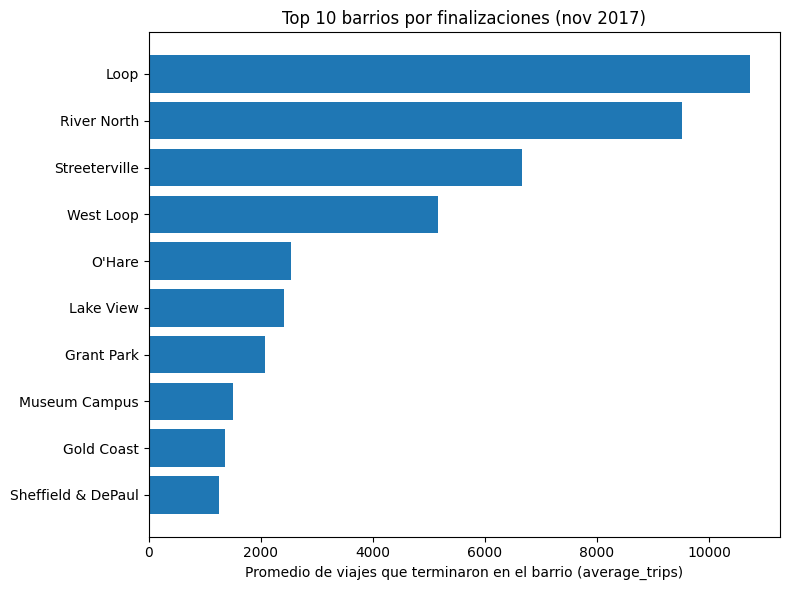

In [29]:
top10_neigh = df_neighborhoods_sorted.head(10).iloc[::-1]  # invertir para gráfico horizontal
plt.figure(figsize=(8,6))
plt.barh(top10_neigh['dropoff_location_name'], top10_neigh['average_trips'])
plt.xlabel('Promedio de viajes que terminaron en el barrio (average_trips)')
plt.title('Top 10 barrios por finalizaciones (nov 2017)')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico de barras con el top 10 por barrios es excelente y los resultados son los esperados. 

</div>

En el grafico podemos observar que la gran mayoría de viajes terminar en el barrio Loop con mas de 10.000 viajes, seguido de River North y Streeterville, lo cual puede deberse a que son los barrios mas poblados y con mas urbanizaciones por lo cual hay mas cantidad de personas viviendo allí, también puede influir que sean los barrios mas cercanos al centro de la ciudad. 

## 

## Prueba de hipótesis

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df_hyp = pd.read_csv('/datasets/project_sql_result_07.csv')

display(df_hyp.head())
df_hyp.info()

start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Vemos que start_ts esta en formato string, debemos convertilo a datetime.

weather_conditions solo debe tener "Good" o "Bad"

duration_seconds es numérica y no contiene NaN.

## Convertir tipos de datos

In [33]:
df_hyp['start_ts'] = pd.to_datetime(df_hyp['start_ts'])

df_hyp.head()

start_ts weather_conditions  duration_seconds  duration_min
0 2017-11-25 16:00:00               Good            2410.0     40.166667
1 2017-11-25 14:00:00               Good            1920.0     32.000000
2 2017-11-25 12:00:00               Good            1543.0     25.716667
3 2017-11-04 10:00:00               Good            2512.0     41.866667
4 2017-11-11 07:00:00               Good            1440.0     24.000000

Para trabajar adecuadamente convertimos:
starts_ts > datetime

## Separar los grupos Good y Bad (solo sábados)

In [35]:
df_hyp['weekday'] = df_hyp['start_ts'].dt.day_name()

df_hyp['weekday'].unique()

array(['Saturday'], dtype=object)

Verificamos que únicamente aparezca "Saturday"

In [37]:
good = df_hyp[df_hyp['weather_conditions'] == 'Good']['duration_min']
bad = df_hyp[df_hyp['weather_conditions'] == 'Bad']['duration_min']

Separamos por clima .

In [38]:
len(good), len(bad)

(888, 180)

Revisamos tamaños de cada grupo. 

## Hipótesis Estadística
Queremos determinar si la duración del viaje cambia cuando llueve los sábados.

H₀ (Hipótesis nula):
La duración promedio de los viajes los sábados es igual entre clima “Good” y clima “Bad”.

𝜇
𝐺
𝑜
𝑜
𝑑
=
𝜇
𝐵
𝑎
𝑑
μ
Good
	​

=μ
Bad
	​


H₁ (Hipótesis alternativa):
La duración promedio es diferente.

𝜇
𝐺
𝑜
𝑜
𝑑
≠
𝜇
𝐵
𝑎
𝑑
μ
Good
	​


=μ
Bad
	​


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo formulando la hipótesis! Es fundamental que sea claro lo que se busca analizar.

</div>

In [40]:
alpha = 0.05

stat, p_value = stats.ttest_ind(good, bad, equal_var=False) 

print("Estadístico t:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Rechazamos H0: Las duraciones son diferentes bajo lluvia.")
else:
    print("No se rechaza H0: No hay evidencia suficiente de diferencia.")

Estadístico t: -7.1860342880686225
p-value: 6.738994326109027e-12
Rechazamos H0: Las duraciones son diferentes bajo lluvia.


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 

</div>

In [41]:
plt.figure(figsize=(6,5))
plt.boxplot([good, bad], labels=['Good Weather', 'Bad Weather'])
plt.ylabel('Duración del viaje (min)')
plt.title('Distribución de duración de viajes (Good vs Bad Weather)')
plt.show()

In [42]:
print("Promedio Good:", good.mean())
print("Promedio Bad:", bad.mean())

Promedio Good: 33.32792792792793
Promedio Bad: 40.45342592592593


## Conclusiones de la prueba de hipótesis

La prueba de hipótesis demostró una diferencia estadísticamente significativa en la duración de los viajes desde el Loop hacia O’Hare entre sábados lluviosos y no lluviosos (p-value ≈ 6.74×10⁻¹²). En promedio, los viajes en días lluviosos son 7.12 minutos más largos, lo que representa un incremento del 21% sobre la duración normal. Con base en estos resultados, se rechaza la hipótesis nula y se concluye que la lluvia sí afecta de manera considerable la duración de los viajes durante los sábados.

## Conclusión general del proyecto
El análisis realizado permitió evaluar si la lluvia afecta la duración de los viajes en taxi desde el Loop hacia el Aeropuerto Internacional O’Hare durante los sábados. A través de un proceso completo de limpieza, exploración y prueba de hipótesis, se identificó que las condiciones lluviosas incrementan de manera significativa el tiempo de viaje, con un aumento promedio de más de 7 minutos respecto a los días sin lluvia. La prueba estadística confirmó que esta diferencia no es producto del azar, por lo que se concluye que el clima es un factor determinante en la duración de los desplazamientos hacia el aeropuerto. Estos resultados pueden apoyar la planificación operativa, optimización de tiempos y toma de decisiones basada en datos para mejorar la experiencia de los usuarios y la eficiencia del servicio.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Dejas durante todo el proyecto comentarios correctos y conclusiones super claras.

</div>